In [37]:
import pandas as pd
import seaborn as sn

## Variables

In [38]:
PATH = "/private/home/jtk/better_analytics/"

## Read data file

In [39]:
df = pd.read_csv(PATH + "test.tsv", sep="\t")

In [40]:
# show table
df.head()

,item_id,annotator_id,score,system
0,1,aa,5,baseline
1,1,bb,4,baseline
2,1,cc,4,baseline
3,2,aa,5,baseline
4,2,bb,2,baseline


## Calculate score per item

In [46]:
df_item = df.groupby(['system','item_id',])\
    .agg({'score'     :['mean',list]})
df_item.columns = ['_'.join(col).strip() for col in df_item.columns.values]

df_item = df_item.reset_index()

In [47]:
df_item.head()

,system,item_id,score_mean,score_list
0,baseline,1,4.333333,"[5, 4, 4]"
1,baseline,2,3.333333,"[5, 2, 3]"
2,baseline,3,4.333333,"[5, 4, 4]"
3,baseline,4,2.666667,"[4, 2, 2]"
4,baseline,5,2.000000,"[4, 1, 1]"


## Plot

<AxesSubplot:xlabel='system', ylabel='score_mean'>

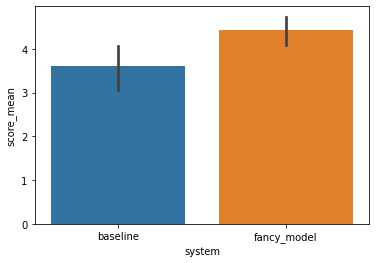

In [51]:
# Make a bar plot comparing baseline and fancy_model
sn.barplot(data=df_item, x="system", y="score_mean")

<AxesSubplot:xlabel='item_id', ylabel='score_mean'>

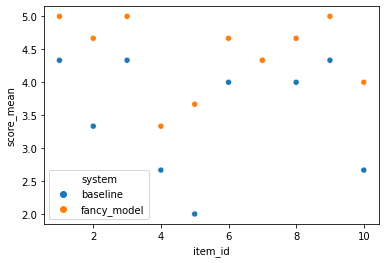

In [49]:
sn.scatterplot(data=df_item, x="item_id", y="score_mean", hue="system")